<a href="https://colab.research.google.com/github/hannahnernst/stoch_sem/blob/main/ST463_Stochastic_Simulation%2C_Training_and_Calibration%2C_Seminar_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Some general remarks about the code below:



*   As you can see, the code is readable by humans (and not just by the Python interpreter): in general, you have to choose informative function and variable names and use consistent formatting. For instance, you can check the [PEP 8 Style Guide for Python](https://www.python.org/dev/peps/pep-0008/) for the widely adopted coding conventions or [this guide for explanation](https://realpython.com/python-pep8/).
*   There are some **food for thought**, denoted with $\clubsuit$-$\star$, where $\star$ denote the number of the **food for thought**: you can submit these exercises to me. Their submission is voluntary, but I will be happy to provide detailed feedbacks. If you decide to submit these exercises please create a new .ipynb file named "ST463 - Lecture I - "YOUR NAME" - "YOUR SURNAME"".
* For each part of the exercise a solution box has been added, but you may insert additional boxes. Do not hesitate to add Text boxes for textual or LaTeX answers (via `+Text`). But make sure to replace any part that says `YOUR CODE HERE` or `YOUR ANSWER HERE` and remove the `raise NotImplementedError()`.

In this seminar, we will learn how to develop a 1D GAN from scratch.


# Select a one-dimensional function to model.

We select
\begin{equation}
y = f(x),
\end{equation}
where $x$ are input values and $y$ are the output values of the function. We will select a function that we can easily understand and plot in order to have an expectation of what the model should be generating and in using a visual inspection of generated examples to get an idea of their quality.

In [ ]:
# Function f(x) = x**2
from matplotlib import pyplot

def calculate(x):
    """Compute the function f(x) = x**2."""
    return x**2

At this point, we can generate random samples or point from the function, in order to obtain $real$ $samples$.

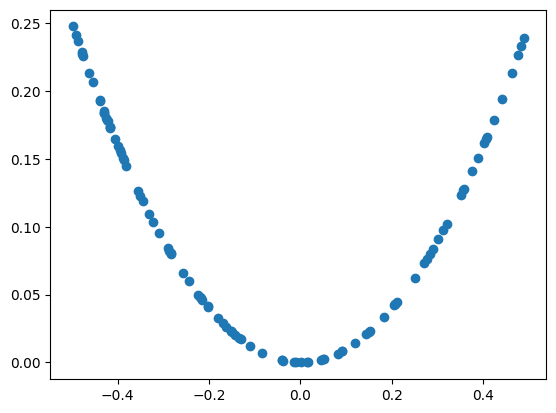

In [ ]:
# Example of generating random samples from x**2
from numpy.random import rand
from numpy import hstack

# Generate randoms sample from x^2
def generate_real_samples(n=100):
    """Generate random samples from f(x) = x**2 over the interval [-0.5, 0.5]"""
    X1 = rand(n) - 0.5
    X2 = X1 * X1
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    return hstack((X1, X2))

data = generate_real_samples()
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()

We can use this function as a starting point for generating real samples for our discriminator function. Specifically, a sample is comprised of a vector with two elements, one for the input and one for the output of our one-dimensional function. We can also imagine how a generator model could generate new samples that we can plot and compare to the expected u-shape of the function $X^2$. Specifically, a generator would output a vector with two elements: one for the input and one for the output of our one-dimensional function.

# Define the Discriminator model.

The model must take a sample from our problem, such as a vector with two elements, and output a classification preditction as to whether the sample is real or fake. This is a binary classification problem.



1.   **Inputs**: Sample with two real values.
2.   **Outputs**: Binary classification, likelihood the sample is real (or fake).

The problem is very simple, meaning that we don’t need a complex neural network to model it. The discriminator model will have one hidden layer with 25 nodes and we will use the ReLU activation function and an appropriate weight initialization method called He weight initialization. The output layer will have one node for the binary classification using the sigmoid activation function. The model will minimize the binary cross-entropy loss function, and the Adam version of stochastic gradient descent will be used because it is very effective.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
# Define the standalone discriminator model
def define_discriminator(n_inputs=2):
    """Define the standalone discriminator model."""
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform',
    input_dim=n_inputs))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = define_discriminator()
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 25)                  │              75 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

# Define the Generator model.

The generator model takes as input a point from the latent space and generates a new sample, e.g. a vector with both the input and output elements of our function, e.g. $x$ and $x^2$. A latent variable is a hidden or unobserved variable, and a latent space is a multi-dimensional vector space of these variables. We can define the size of the latent space for our problem and the shape or distribution of variables in the latent space.

This is because the latent space has no meaning until the generator model starts assigning meaning to points in the space as it learns. After training, points in the latent space will correspond to points in the output space, e.g. in the space of generated samples. We will define a small latent space of five dimensions and use Gaussian distribution for each variable in the latent space. We will generate new inputs by drawing random numbers from a standard Gaussian distribution, i.e. mean of zero and a standard deviation of one.

1.   **Inputs**:  Point in latent space, e.g. a five-element vector of Gaussian random numbers.
2.   **Outputs**: Two-element vector representing a generated sample for our function ($x$ and $x^2$).

In [ ]:
# Define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
    """Define the standalone generator model."""
    model = Sequential()
    model.add(Dense(15, activation='relu', kernel_initializer='he_uniform',input_dim=latent_dim))
    model.add(Dense(n_outputs, activation='linear'))
    return model

model = define_generator(5)# You can change this hyper-parameter.
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 15)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │              32 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122 (488.00 B)

 Trainable params: 122 (488.00 B)

 Non-trainable params: 0 (0.00 B)

We can see that the model takes as input a random five-element vector from the latent space and outputs a two-element vector for our one-dimensional function. This model cannot do much at the moment. Nevertheless, we can demonstrate how to use it to generate samples.

The first step is to generate new random points in the latent space.

In [ ]:
import numpy as np
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
    """Generate points in latent space as input for the generator."""
    # generate points in the latent space
    x_input = np.random.randn(latent_dim * n)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n, latent_dim)
    return x_input

Next, we can use the generated points as input the generator model to generate new samples, then plot the samples.

In [ ]:
# Use the generator to generate n fake examples and plot the results
def generate_fake_samples(generator, latent_dim, n):
  """Function that generate fake samples"""
  # generate points in latent space
  x_input = generate_latent_points(latent_dim, n)
  # predict outputs
  X = generator.predict(x_input)
  # plot the results
  pyplot.scatter(X[:, 0], X[:, 1])
  pyplot.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


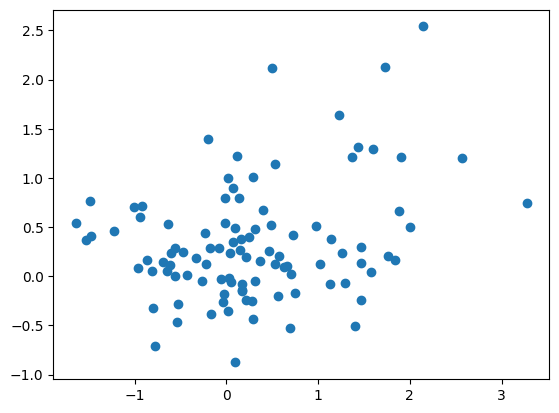

In [ ]:
# size of the latent space
latent_dim = 5
# define the discriminator model
model = define_generator(latent_dim)
# generate and plot generated samples
generate_fake_samples(model, latent_dim, 100)

Running the example generates 100 random points from the latent space, uses this as input to the generator and generates 100 fake samples from our one-dimensional function domain. As the generator has not been trained, the generated points are complete rubbish, as we expect, but we can imagine that as the model is trained, these points will slowly begin to resemble the target function and its u-shape.

# Training the Generator model.

The weights in the generator model are updated based on the performance of the discriminator model. When the discriminator is good at detecting fake samples, the generator is updated more (via a larger error gradient), and when the discriminator model is relatively poor or confused when detecting fake samples, the generator model is updated less. This defines the zero-sum or adversarial relationship between these two models. There may be many ways to implement this using the Keras API, but perhaps the simplest approach is to create a new model that subsumes or encapsulates the generator and discriminator models. Specifically, a new GAN model can be defined that stacks the generator and discriminator such that the generator receives as input random points in the latent space, generates samples that are fed into the discriminator model directly, classified, and the output of this larger model can be used to update the model weights of the generator. To be clear, we are not talking about a new third model, just a logical third model that uses the already-defined layers and weights from the standalone generator and
discriminator models.

Only the discriminator is concerned with distinguishing between real and fake examples; therefore, the discriminator model can be trained in a standalone manner on examples of each. The generator model is only concerned with the discriminator’s performance on fake examples. Therefore, we will mark all of the layers in the discriminator as not trainable when it is part of the GAN model so that they cannot be updated and overtrained on fake examples.

When training the generator via this subsumed GAN model, there is one more important change. The generator wants the discriminator to think that the samples output by the generator are real, not fake. Therefore, when the generator is trained as part of the GAN model, we will mark the generated samples as real (class = 1). We can imagine that the discriminator will then classify the generated samples as not real (class = 0) or a low probability of being real
(0.3 or 0.5). The backpropagation process used to update the model weights will see this as a large error and will update the model weights (i.e. only the weights in the generator) to correct for this error, in turn making the generator better at generating plausible fake samples. Let’s make this concrete.



1.   **Inputs:** Point in latent space, e.g. a five-element vector of Gaussian random numbers.
2.   **Outputs**: Binary classification, likelihood the sample is real (or fake).

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    """Define the combined generator and discriminator model, for updating the generator."""
# make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# summarize gan model
gan_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)            │ (None, 2)                   │             122 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_5 (Sequential)            │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 223 (892.00 B)

 Trainable params: 122 (488.00 B)

 Non-trainable params: 101 (404.00 B)

In [ ]:
# train the composite model
def train_gan(gan_model, latent_dim, n_epochs=10000, n_batch=128):
  """Function to train the composite model."""
  # manually enumerate epochs
  for i in range(n_epochs):
   # prepare points in latent space as input for the generator
   x_gan = generate_latent_points(latent_dim, n_batch)
   # create inverted labels for the fake samples
   y_gan = np.ones((n_batch, 1))
   # update the generator via the discriminator's error gan_model.train_on_batch(x_gan, y_gan)

Instead, what is required is that we first update the discriminator model with real and fake samples, then update the generator via the composite model. This requires combining elements from the **train_discriminator()** function defined in the discriminator section and the **train_gan()** function defined above. It also requires that the **generate_fake_samples()** function use the generator model to generate fake samples instead of generating random numbers. The complete train function for updating the discriminator model and the generator (via the composite model) is listed below.


In [ ]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128):
     """Function to train the generator and the discriminator."""
     # determine half the size of one batch, for updating the discriminator
     half_batch = int(n_batch / 2)
     # manually enumerate epochs
     for i in range(n_epochs):
        # prepare real samples
        x_real, y_real = generate_real_samples(half_batch)
        # prepare fake examples
        x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch) # update discriminator
        d_model.train_on_batch(x_real, y_real)
        d_model.train_on_batch(x_fake, y_fake)
        # prepare points in latent space as input for the generator
        x_gan = generate_latent_points(latent_dim, n_batch)
        # create inverted labels for the fake samples
        y_gan = np.ones((n_batch, 1))
        # update the generator via the discriminator's error gan_model.train_on_batch(x_gan, y_gan)

We almost have everything we need to develop a GAN for our one-dimensional function. One remaining aspect is the evaluation of the model.

# Evaluating the Performance of the GAN

we will use the subjective approach used in most GAN applications. Specifically, we will use the generator to generate new samples and inspect them relative to real samples from the domain. First, we can use the **generate_real_samples()** function developed in the discriminator part above to generate real examples. Creating a scatter plot of these examples will create the familiar u-shape of our target function.

In [ ]:
# generate n real samples with class labels
def generate_real_samples(n):
  """Function that generate real samples."""
  # generate inputs in [-0.5, 0.5]
  X1 = rand(n) - 0.5
  # generate outputs X^2
  X2 = X1 * X1
  # stack arrays
  X1 = X1.reshape(n, 1)
  X2 = X2.reshape(n, 1)
  X = hstack((X1, X2))
  # generate class labels
  y = np.ones((n, 1))
  return X, y

Next, we can use the generator model to generate the same number of fake samples. This re- quires first generating the same number of points in the latent space via the **generate_latent_points()** function developed in the generator section above. These can then be passed to the generator model and used to generate samples that can also be plotted on the same scatter plot.

In [ ]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
  """Function that generate latent points."""
  # generate points in the latent space
  x_input = np.randn(latent_dim * n)
  # reshape into a batch of inputs for the network
  x_input = x_input.reshape(n, latent_dim)
  return x_input

The **generate_fake_samples()** function below generates these fake samples and the associ- ated class label of 0 which will be useful later.

In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
  """Function that generate fake samples."""
  # generate points in latent space
  x_input = generate_latent_points(latent_dim, n)
  # predict outputs
  X = generator.predict(x_input)
  # create class labels
  y = np.zeros((n, 1))
  return X, y

Having both samples plotted on the same graph allows them to be directly compared to see if the same input and output domain are covered and whether the expected shape of the target function has been appropriately captured, at least subjectively. The **summarize_performance()** function below can be called any time during training to create a scatter plot of real and generated points to get an idea of the current capability of the generator model.

In [ ]:
# plot real and fake points
def summarize_performance(generator, latent_dim, n=100):
    """Function that summarize the performance."""
    # prepare real samples
    x_real, y_real = generate_real_samples(n)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
    # scatter plot real and fake data points
    pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
    pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
    pyplot.show()

We may also be interested in the performance of the discriminator model at the same time. Specifically, we are interested to know how well the discriminator model can correctly identify real and fake samples. A good generator model should make the discriminator model confused, resulting in a classification accuracy closer to 50% on real and fake examples. We can update the **summarize_performance()** function to also take the discriminator and current epoch number as arguments and report the accuracy on the sample of real and fake examples. It will also generate a plot of synthetic plots and save it to file for later review.


In [ ]:

# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
    """Function that summarize the performance, updated."""
    # prepare real samples
    x_real, y_real = generate_real_samples(n)
    # evaluate discriminator on real examples
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
    # evaluate discriminator on fake examples
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    # summarize discriminator performance
    print(epoch, acc_real, acc_fake)
    # scatter plot real and fake data points
    pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
    pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')

This function can then be called periodically during training. For example, if we choose to train the models for 10,000 iterations, it may be interesting to check-in on the performance of the model every 2,000 iterations. We can achieve this by parameterizing the frequency of the check-in via n eval argument, and calling the **summarize_performance()** function from the **train()** function after the appropriate number of iterations. The updated version of the **train()** function with this change is listed below.

In [ ]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128,n_eval=2000):
  # determine half the size of one batch, for updating the discriminator
  half_batch = int(n_batch / 2)
  # manually enumerate epochs
  for i in range(n_epochs):
    # prepare real samples
    x_real, y_real = generate_real_samples(half_batch)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
    # update discriminator
    d_model.train_on_batch(x_real, y_real)
    d_model.train_on_batch(x_fake, y_fake)
    # prepare points in latent space as input for the generator
    x_gan = generate_latent_points(latent_dim, n_batch)
    # create inverted labels for the fake samples
    y_gan = np.ones((n_batch, 1))
    # update the generator via the discriminator's error gan_model.train_on_batch(x_gan, y_gan)
    # evaluate the model every n_eval epochs
    if (i+1) % n_eval == 0:
        summarize_performance(i, g_model, d_model, latent_dim)

# Complete Example of Training the GAN

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
24 0.3400000035762787 0.5400000214576721
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━

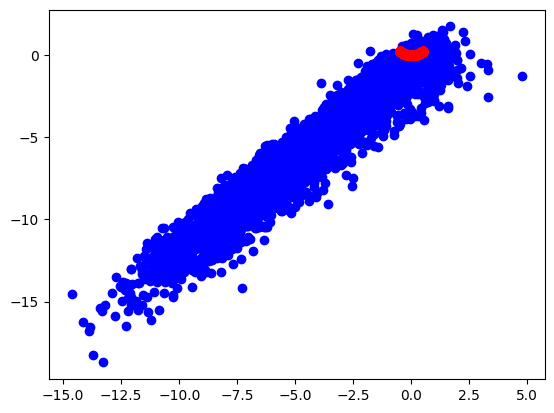

In [ ]:
# train a generative adversarial network on a one-dimensional function
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

# define the standalone discriminator model
def define_discriminator(n_inputs=2):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform',input_dim=n_inputs))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
    model = Sequential()
    model.add(Dense(15, activation='relu', kernel_initializer='he_uniform',input_dim=latent_dim))
    model.add(Dense(n_outputs, activation='linear'))
    return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
  # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
     # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# generate n real samples with class labels
def generate_real_samples(n):
  # generate inputs in [-0.5, 0.5]
  X1 = rand(n) - 0.5
  # generate outputs X^2
  X2 = X1 * X1
  # stack arrays
  X1 = X1.reshape(n, 1)
  X2 = X2.reshape(n, 1)
  X = hstack((X1, X2))
  # generate class labels
  y = ones((n, 1))
  return X, y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
  # generate points in the latent space
  x_input = randn(latent_dim * n)
  # reshape into a batch of inputs for the network
  x_input = x_input.reshape(n, latent_dim)
  return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
  # generate points in latent space
  x_input = generate_latent_points(latent_dim, n)
  # predict outputs
  X = generator.predict(x_input)
  # create class labels
  y = zeros((n, 1))
  return X, y

# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
    # prepare real samples
    x_real, y_real = generate_real_samples(n)
    # evaluate discriminator on real examples
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
    # evaluate discriminator on fake examples
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    # summarize discriminator performance
    print(epoch, acc_real, acc_fake)
    # scatter plot real and fake data points
    pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
    pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')

# train the generator and discriminator
# Try with 20000 iterations.
def train(g_model, d_model, gan_model, latent_dim, n_epochs=2000, n_batch=256, n_eval=25):
  # determine half the size of one batch, for updating the discriminator
  half_batch = int(n_batch / 2)
  # manually enumerate epochs
  for i in range(n_epochs):
    # prepare real samples
    x_real, y_real = generate_real_samples(half_batch)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
    # update discriminator
    d_model.train_on_batch(x_real, y_real)
    d_model.train_on_batch(x_fake, y_fake)
    # prepare points in latent space as input for the generator
    x_gan = generate_latent_points(latent_dim, n_batch)
    # create inverted labels for the fake samples
    y_gan = np.ones((n_batch, 1))
    # update the generator via the discriminator's error
    gan_model.train_on_batch(x_gan, y_gan)
    # evaluate the model every n_eval epochs
    if (i+1) % n_eval == 0:
        summarize_performance(i, g_model, d_model, latent_dim)

# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)